## Analyze the shopping trend dataset by answering the questions below.
> **IMPORTANT** write your insights after each question

# Read the data

In [1]:
# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import seaborn as sns
import matplotlib.pyplot as plt

# Set the path to the file you'd like to load
file_path = "shopping_trends_updated.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iamsouravbanerjee/customer-shopping-trends-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

/tmp/ipython-input-3330809629.py:12: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'customer-shopping-trends-dataset' dataset.


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Question 1
What is the distribution of `Purchase Amount (USD)` for different `Subscription Status` values?
- Plot using both **Seaborn’s `boxplot` and Matplotlib’s histogram**.
- Are there any outliers?

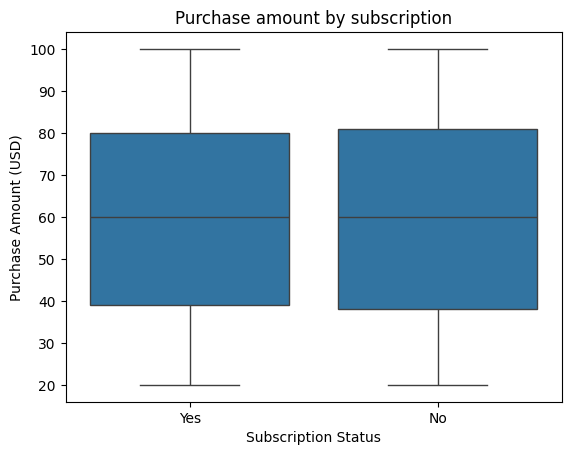

In [2]:
sns.boxplot(x="Subscription Status", y="Purchase Amount (USD)", data=df)
plt.title("Purchase amount by subscription")
plt.show()

No outliers bc. there are no values above/below max/min

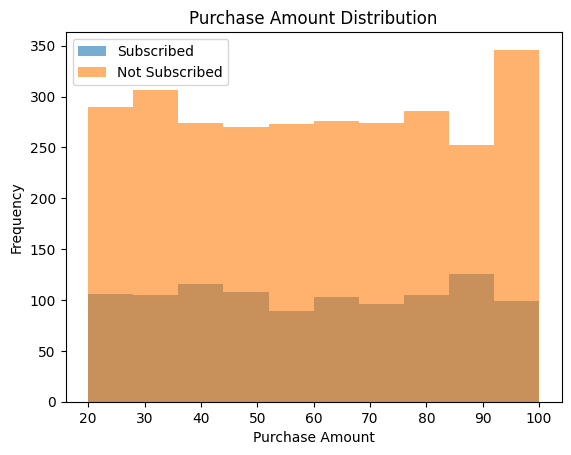

In [26]:
sub=df[df["Subscription Status"]=="Yes"]
notsub=df[df["Subscription Status"]=="No"]
plt.hist(sub["Purchase Amount (USD)"], label="Subscribed", alpha=0.6)
plt.hist(notsub["Purchase Amount (USD)"], label="Not Subscribed", alpha=0.6)
plt.legend()
plt.title("Purchase Amount Distribution")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.show()

### Question 2
Compare the frequency of each `Payment Method` across the dataset **from highest to lowest** .
- Use both **Seaborn's `countplot`** and **Matplotlib's bar plot**.

<BarContainer object of 6 artists>

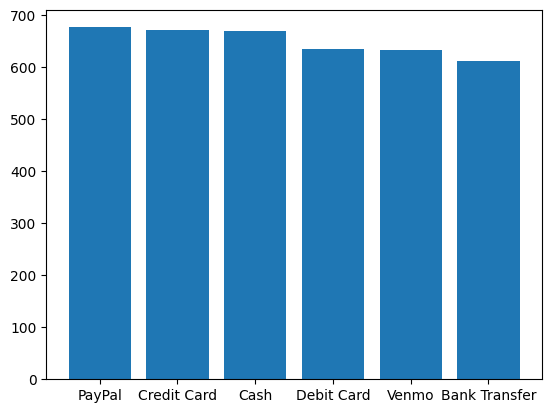

In [4]:
methods=df["Payment Method"].value_counts()
y=methods.values
x=methods.index
plt.bar(x,y)

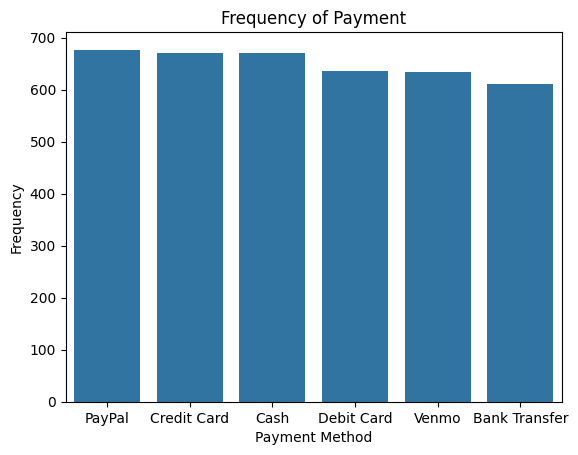

In [5]:
orderedmethods= methods.index
sns.countplot(x="Payment Method", data=df, order=orderedmethods)
plt.title("Frequency of Payment")
plt.xlabel("Payment Method")
plt.ylabel("Frequency")
plt.show()

### Question 3
Show the number of purchases made by each `Gender` in each `Season`.
- Create a **grouped bar chart/ Pie chart using Matplotlib**.
- Also plot a **stacked countplot using Seaborn**.

In [31]:
genderseason = df.pivot_table(index='Season',columns='Gender',values='Purchase Amount (USD)', aggfunc='count')
genderseason

Gender,Female,Male
Season,,
Fall,328,647
Spring,316,683
Summer,298,657
Winter,306,665


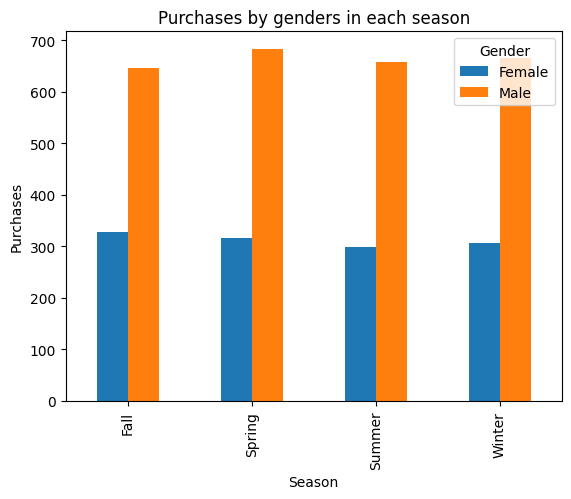

In [33]:
genderseason.plot(kind="bar")
plt.title("Purchases by genders in each season")
plt.xlabel("Season")
plt.ylabel("Purchases")
plt.show()

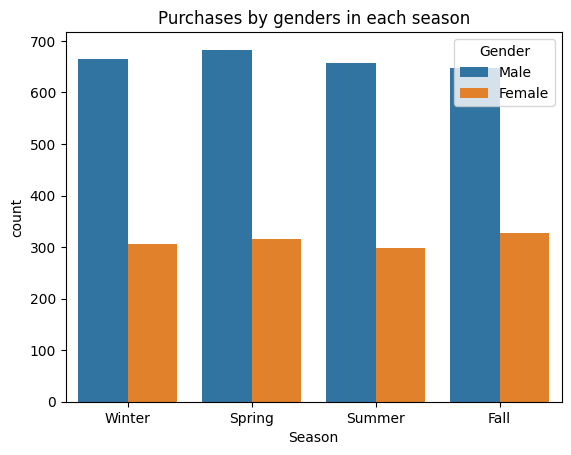

In [38]:
sns.countplot(x="Season", hue="Gender", data=df)
plt.title("Purchases by genders in each season")
plt.show()

### Question 4
Create a heatmap showing the correlation between all numeric columns.
- Use `sns.heatmap`.
- Interpret the relationship between `Previous Purchases`, `Purchase Amount`, and `Review Rating`.

Text(0.5, 1.0, 'Heatmap of Correlation')

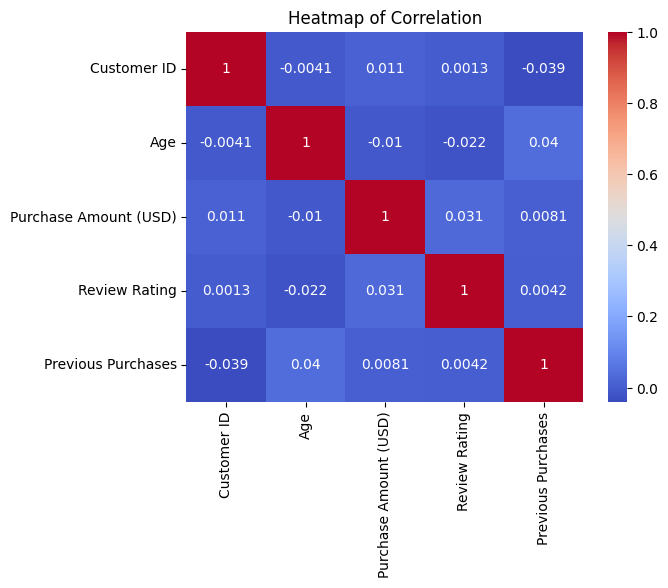

In [7]:
numerical_data = df.select_dtypes(include=['float64', 'int64'])
corr = numerical_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Heatmap of Correlation")

Interpret the relationship between Previous Purchases, Purchase Amount, and Review Rating.
1. Previous purchases & purchase amount: weak correlation, previous purchases don't indicate spending a lot
2. Previous purchases & review rating: weak correlation, previous purchases don't indicate leaving high reviews
3. Purchase amount & review rating: spenders leave higher reviews

### Question 5
Create a scatter plot of `Age` vs `Purchase Amount (USD)`, color-coded by `Gender`.
- Use **Matplotlib and Seaborn side-by-side**.
- Add a trend line in Seaborn using `regplot`.

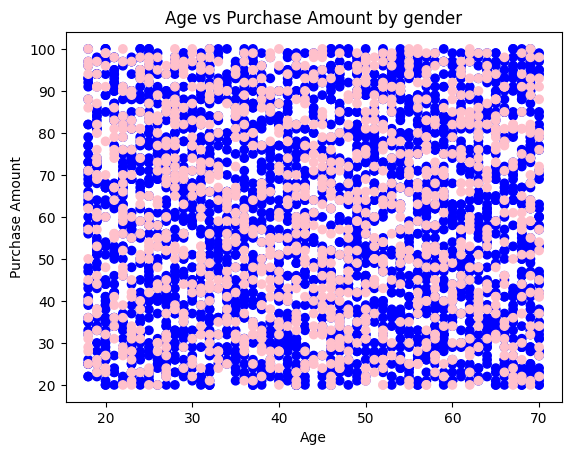

In [42]:
from matplotlib import colors
x=df["Age"]
y=df["Purchase Amount (USD)"]
#colors=["pink" if df[Gender]=="Female" else "blue" for Gender in df["Gender"]]
colors=df["Gender"].map({"Female": "pink", "Male": "blue"})
plt.scatter(x,y, c=colors)
plt.title("Age vs Purchase Amount by gender")
plt.xlabel("Age")
plt.ylabel("Purchase Amount")
plt.show()

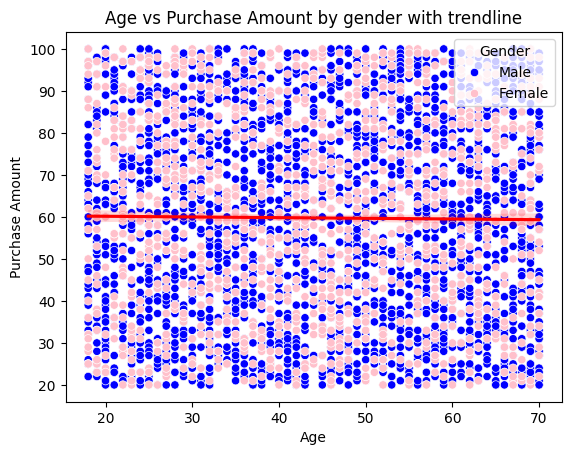

In [43]:
sns.scatterplot(x="Age", y="Purchase Amount (USD)", hue="Gender", data=df, palette={"Female": "pink", "Male": "blue"})
sns.regplot(x="Age", y="Purchase Amount (USD)", data=df, scatter=False, color="Red")
plt.title("Age vs Purchase Amount by gender with trendline")
plt.xlabel("Age")
plt.ylabel("Purchase Amount")
plt.show()

### Question 6
How does the average review rating differ across different item `Categories` and `Sizes`?
- Use **Seaborn’s heatmap or pivot heatmap** to visualize.
- Use Pandas pivot table to prepare the data.

Text(0.5, 1.0, 'Review by Category and Size')

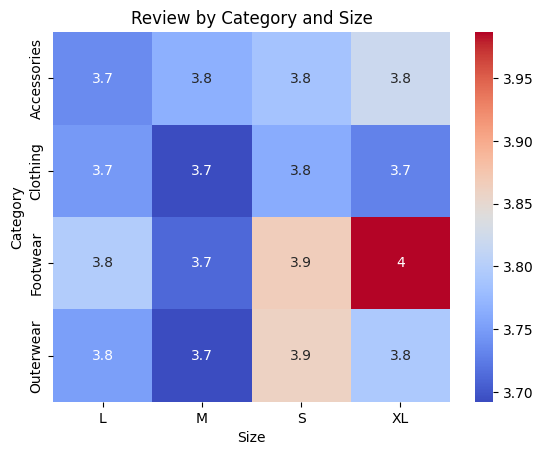

In [9]:
pivot= df.pivot_table(index="Category", columns="Size", values="Review Rating")
sns.heatmap(pivot, annot=True, cmap="coolwarm")
plt.title("Review by Category and Size")

### Question 7
Which combinations of `Season` and `Shipping Type` lead to the highest average `Purchase Amount (USD)`?
- Show this as a **grouped bar chart** and as a **heatmap**.

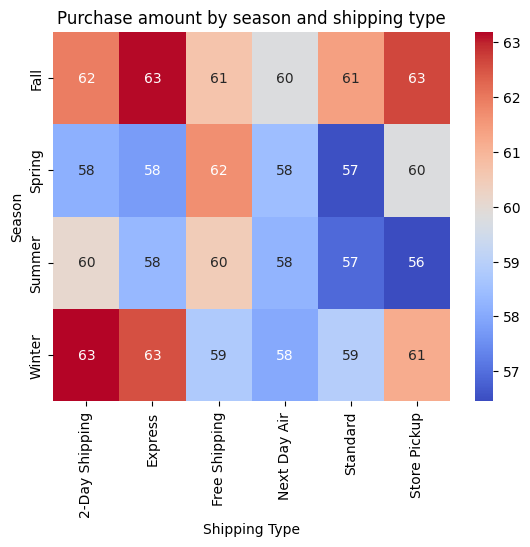

In [10]:
pivot= df.pivot_table(index="Season", columns="Shipping Type", values="Purchase Amount (USD)")
sns.heatmap(pivot, annot=True, cmap="coolwarm")
plt.title("Purchase amount by season and shipping type")
plt.show()

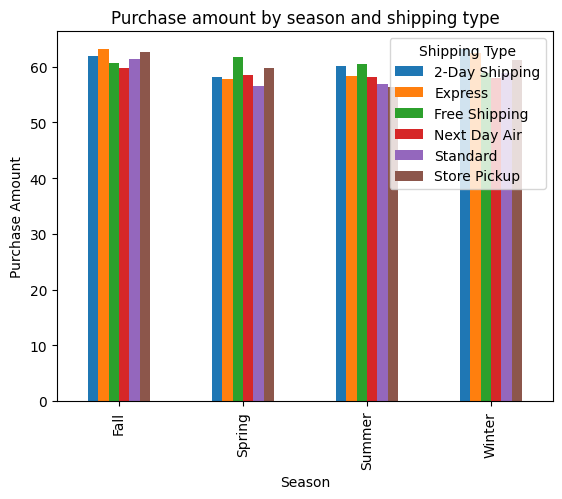

In [11]:
pivot.plot(kind="bar")
plt.title("Purchase amount by season and shipping type")
plt.xlabel("Season")
plt.ylabel("Purchase Amount")
plt.show()

### Question 8
Plot a violin plot of `Review Rating` by `Gender` for each `Subscription Status`.
- Use `sns.violinplot` with `hue`.

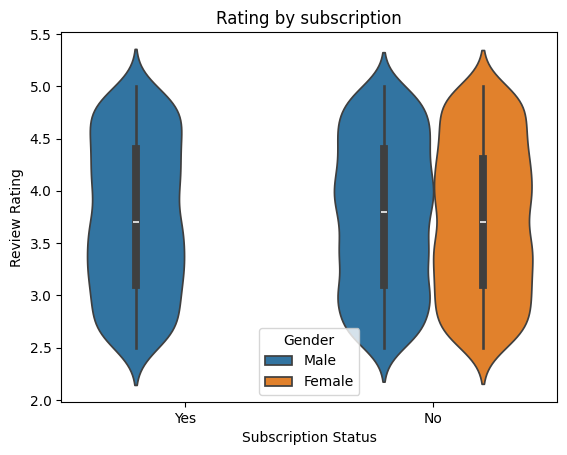

In [12]:
sns.violinplot(x="Subscription Status", y="Review Rating", hue="Gender", data=df)
plt.title("Rating by subscription")
plt.show()

In [13]:
df[df['Subscription Status'] == 'Yes']['Gender'].value_counts()


,count
Gender,
Male,1053


### Question 9
What are the top 5 most purchased `Item Purchased` by total `Purchase Amount`?
- Use Pandas aggregation, plot with **Matplotlib pie and bar** charts.

In [14]:
topitems= df.groupby("Item Purchased")["Purchase Amount (USD)"].sum().sort_values(ascending=False).head()
topitems

,Purchase Amount (USD)
Item Purchased,
Blouse,10410
Shirt,10332
Dress,10320
Pants,10090
Jewelry,10010


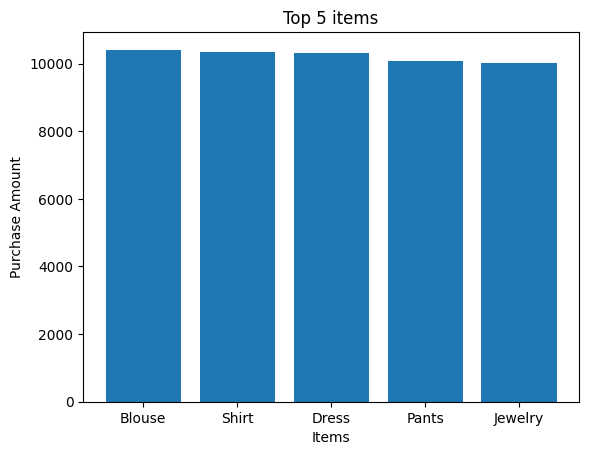

In [15]:
x=topitems.index
y=topitems.values
plt.bar(x,y)
plt.title("Top 5 items")
plt.xlabel("Items")
plt.ylabel("Purchase Amount")
plt.show()

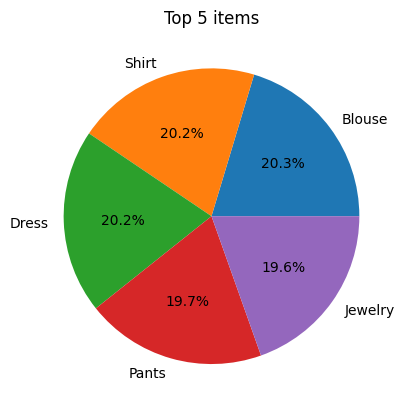

In [16]:
plt.pie(y,labels=x, autopct="%1.1f%%")
plt.title("Top 5 items")
plt.show()

### Question 10
Which `Location` has the highest average `Purchase Amount`, and how does it relate to `Previous Purchases` (plot only top 5 purchase amount location)?
- Use a **Seaborn scatterplot** with size/marker variation.

In [17]:
toploc=df.groupby("Location")["Purchase Amount (USD)"].mean().sort_values(ascending=False).head()
toploc

,Purchase Amount (USD)
Location,
Alaska,67.597222
Pennsylvania,66.567568
Arizona,66.553846
West Virginia,63.876543
Nevada,63.379310


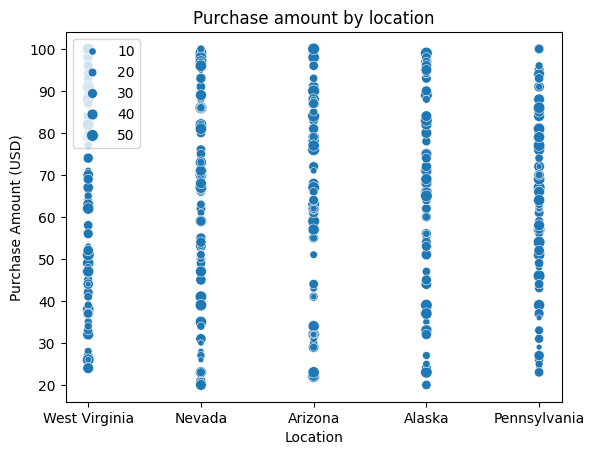

In [18]:
toploc_df=df[df["Location"].isin(toploc.index)]
sns.scatterplot(x="Location", y="Purchase Amount (USD)", size="Previous Purchases", data=toploc_df)
plt.title("Purchase amount by location")
plt.legend(loc="upper left")
plt.show()

### Question 11
Using a crosstab, find how `Gender` and `Size` interact.
- Plot using `sns.heatmap`.

Text(0.5, 1.0, 'Gender by size')

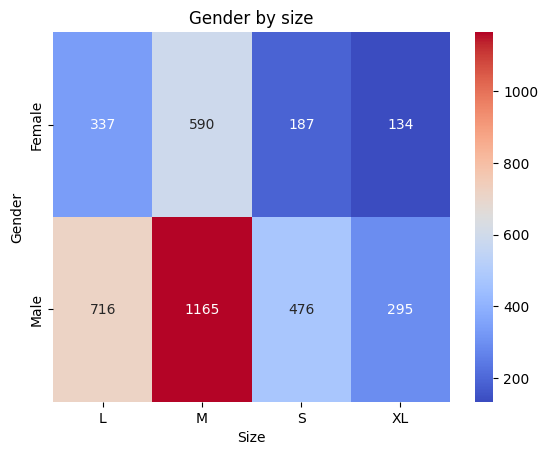

In [19]:
import pandas as pd
crosstab= pd.crosstab(df["Gender"], df["Size"])
sns.heatmap(crosstab, annot=True, cmap="coolwarm", fmt="d")
plt.title("Gender by size")

### Question 12
How does the frequency of purchases column influence the use of promo codes?
- Create a **stacked bar chart** using Matplotlib and compare with a **Seaborn countplot**.

In [20]:
promocode=pd.crosstab(df["Frequency of Purchases"], df["Promo Code Used"])
promocode

Promo Code Used,No,Yes
Frequency of Purchases,,
Annually,334,238
Bi-Weekly,321,226
Every 3 Months,326,258
Fortnightly,299,243
Monthly,316,237
Quarterly,322,241
Weekly,305,234


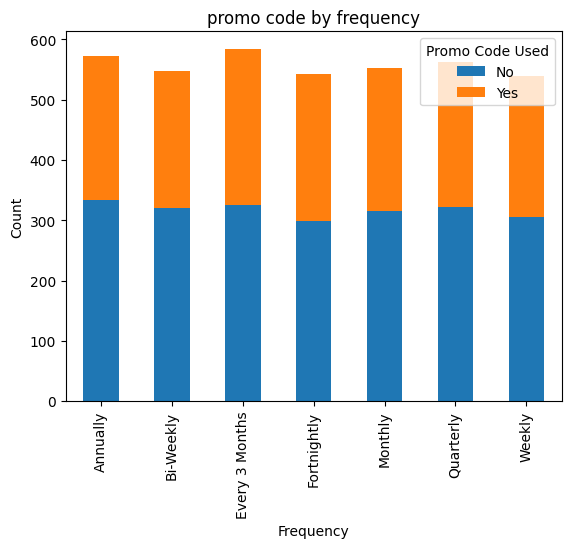

In [21]:
promocode.plot(kind="bar", stacked=True)
plt.title("promo code by frequency")
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.show()

Text(0.5, 1.0, 'promo code by frequency')

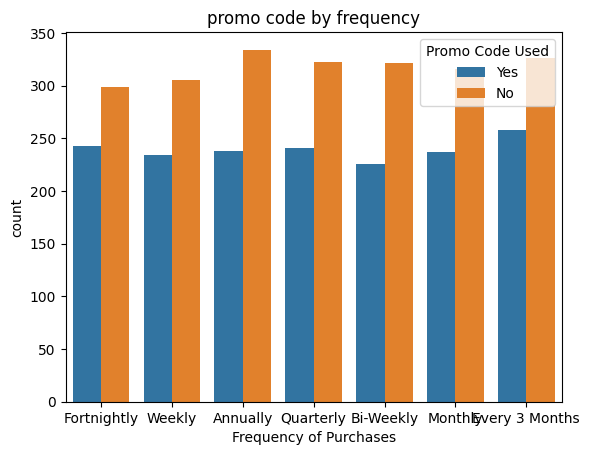

In [22]:
sns.countplot(x="Frequency of Purchases", hue="Promo Code Used", data=df)
plt.title("promo code by frequency")

### Question 13
Using a pairplot, show pairwise relationships between numeric columns segmented by `Gender`.
- Use `sns.pairplot` with `hue="Gender"`.

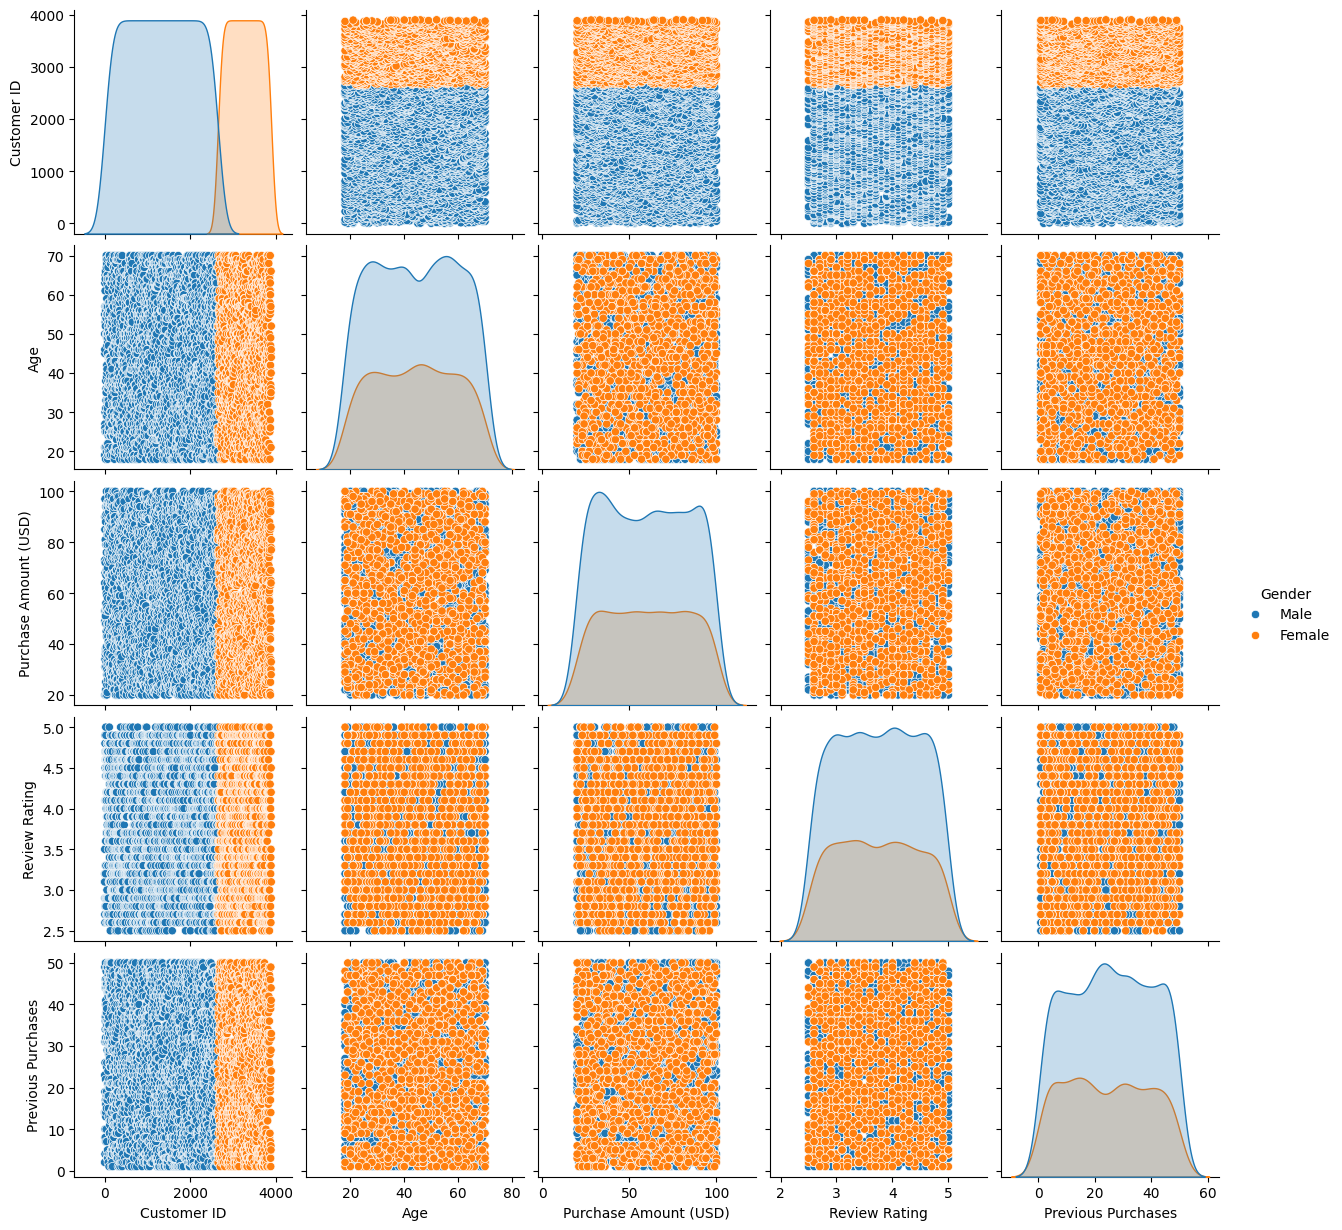

In [23]:
num_data = numerical_data.columns.tolist() + ['Gender']
sns.pairplot(df[num_data], hue='Gender')
plt.show()